In [35]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt # biblioteca para plotar gráficos
import seaborn as sns # Biblioteca de visualização mais elaborada baseada no matplotlib

In [36]:
def ApplyesKFold(x_axis, y_axis, k):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import ElasticNet
    from sklearn.linear_model import Ridge
    from sklearn.linear_model import Lasso
    from sklearn.tree import DecisionTreeClassifier


    # Cross-Validation modelos.
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import KFold

    # Configuração KFold.
    # shuffle=True, Shuffle (embaralhar) o dataset.
    kfold = KFold(n_splits=k, shuffle=True)

    # Axis
    x = x_axis
    y = y_axis

    # Instancias de modelos.
    linearRegression = LinearRegression()
    elasticNet = ElasticNet()
    ridge = Ridge()
    lasso = Lasso()
    decisionTree = DecisionTreeClassifier(criterion="gini")


    # Aplica o KFold aos modelos.
    linearRegression_result = cross_val_score(linearRegression, x, y, cv=kfold)
    elasticNet_result = cross_val_score(elasticNet, x, y, cv=kfold)
    ridge_result = cross_val_score(ridge, x, y, cv=kfold)
    lasso_result = cross_val_score(lasso, x, y, cv=kfold)
    decisionTree_result = cross_val_score(decisionTree, x, y, cv=kfold)

    # Cria um dicionário para armazenar modelos lineares.
    dic_models = {
        "LinearRegression": [linearRegression_result.mean(),linearRegression_result.std()],
        "ElasticNet": [elasticNet_result.mean(),elasticNet_result.std()],
        "Ridge": [ridge_result.mean(),ridge_result.std()],
        "Lasso": [lasso_result.mean(),lasso_result.std()],
        "DecisionTree": [decisionTree_result.mean(), decisionTree_result.std()]
    }
   
    for modelo, result in dic_models.items():
        mean = result[0]
        dv = result[1]
        print("-"*10,modelo,"-"*10)
        print('Acurácia média: {}'.format(mean))
        print('Intervalo de acurácia: [{} ~ {}]\n'
            .format((mean - 2*dv), (mean + 2*dv)))

    # Selecione o melhor modelo.
    bestModel = max(dic_models, key=dic_models.get)

    print("O melhor modelo é: {0} com valor: {1}".format(
        bestModel, dic_models[bestModel][0]))


# Descrição

Estamos partindo da ideia que fundamos uma empresa de telefonia móvel. E como somos novatos nessa área, não sabemos estimar o preço para os celulares fabricados.
Como queremos bater de frente com grandes empresas como Apple, Samsung etc. Não podemos simplemente supor um valor qualquer.

Dito isso, para resolver esse problema, nós buscamos e coletamos os dados de vendas dos celulares de diversas empresas.

Com isso, nós esperamos descobrir alguma relação entre as características do celular (Memória RAM, Processador, Armazenamento) e seu preço de venda. 
Atraves do Machine Learning pretendemos estimiar faixa de preço indicando o quão alto é o preço, e não o preço real.

O conjunto de dados é descrito da seguinte forma:

Atributo        | Tipo do dado  | Descrição
|---------------|:-------------:|:-------------:|
| id            | Integer       |   Identificador | 
| bateria_power | Integer       |   Energia total que uma bateria pode armazenar em um tempo medido em mAh | 
| blue          | Boolean       |   Tem bluetooth ou não   | 
| clock_speed   | Float         |   Velocidade na qual o microprocessador executa instruções|
| dual_sim      | Boolean       |   Tem suporte dual sim ou não|
| fc            | Integer       |   Mega pixels da câmera fontal   |
| four_g        | Boolean       |   Tem 4G ou não  |
| int_memory    | Integer       |   Memória internar em Gigabytes |
| m_dep         | Float         |   Profundidade do celular em cm|
| mobile_wt     | Integer       |   Peso do celular |
| n_cores       | Integer       |   Número de núcleos do processador |
| pc            | Integer       |   Mega pixels da câmera principal|
| px_height     | Integer       |   Altura da resolução do pixel|
| px_width      | Integer       |   Largura da resolução do pixel|
| ram           | Integer       |   Memória RAM em Megabytes|
| sc_h          | Integer       |   Altura da tela do celular em cm|
| sc_w          | Integer       |   Largura da tela do celular em cm|
| talk_time     | Integer       |   Maior tempo que uma única carga da bateria durará quando você estiver em 100%|
| three_g       | Boolean       |   Tem 3G ou não|
| touch_screen  | Boolean       |   Tem touch screen ou não|
| wifi          | Boolean       |   Tem wifi ou não|
| price_range   | Integer       |   0: Baixo Custo, 1: Custo Médio, 2: Custo Alto, 3: Custo Muito Alto|

Os dados foram retirados do kaggle: [mobile price classification](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification).


## Explorando os dados

In [40]:
df = pd.read_csv("datasetMobile/train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [42]:
# Verificando se têm alguma célula vazia no arquivo.
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [41]:
# Preparando separando os dados em feature e target.
# Testanto com o k-Fold como cada modelo linear se sair e pegando sua melhor acuracia

data_X = df.drop('price_range', axis=1)
data_Y = df['price_range']

ApplyesKFold(data_X, data_Y, 10)

---------- LinearRegression ----------
Acurácia média: 0.916516659970816
Intervalo de acurácia: [0.9055641055391642 ~ 0.9274692144024678]

---------- ElasticNet ----------
Acurácia média: 0.9166224819038179
Intervalo de acurácia: [0.9022576542003162 ~ 0.9309873096073196]

---------- Ridge ----------
Acurácia média: 0.9163857854221465
Intervalo de acurácia: [0.901219327973452 ~ 0.9315522428708412]

---------- Lasso ----------
Acurácia média: 0.9162644574661979
Intervalo de acurácia: [0.9028035478069489 ~ 0.9297253671254468]

---------- DecisionTree ----------
Acurácia média: 0.829
Intervalo de acurácia: [0.7815026316518483 ~ 0.8764973683481516]

O melhor modelo é: ElasticNet com valor: 0.9166224819038179


<AxesSubplot:ylabel='price_range'>

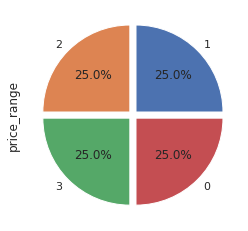

In [45]:
# Verificando como as classes target são distribuídas
data_Y.value_counts().plot.pie(autopct='%1.1f%%', explode=[0.05, 0.05, 0.05, 0.05])

### Analisando a correlação entre as variáveis numéricas

Para identificar a relação entre as variáveis numéricas, vamos fazer uma análise bivariada para entender o comportamento.

Faremos uso da biblioteca [seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html). 
Em termos de força de relacionamento, o valor do coeficiente de correlação varia entre +1 e -1. Um valor de ± 1 indica um grau perfeito de associação entre as duas variáveis. À medida que o valor do coeficiente de correlação se aproxima de 0, a relação entre as duas variáveis ​​será mais fraca. A direção da relação é indicada pelo sinal do coeficiente; um sinal + indica uma relação positiva e um sinal - indica uma relação negativa.
Mais informações na [documentação](https://towardsdatascience.com/pearson-coefficient-of-correlation-explained-369991d93404).

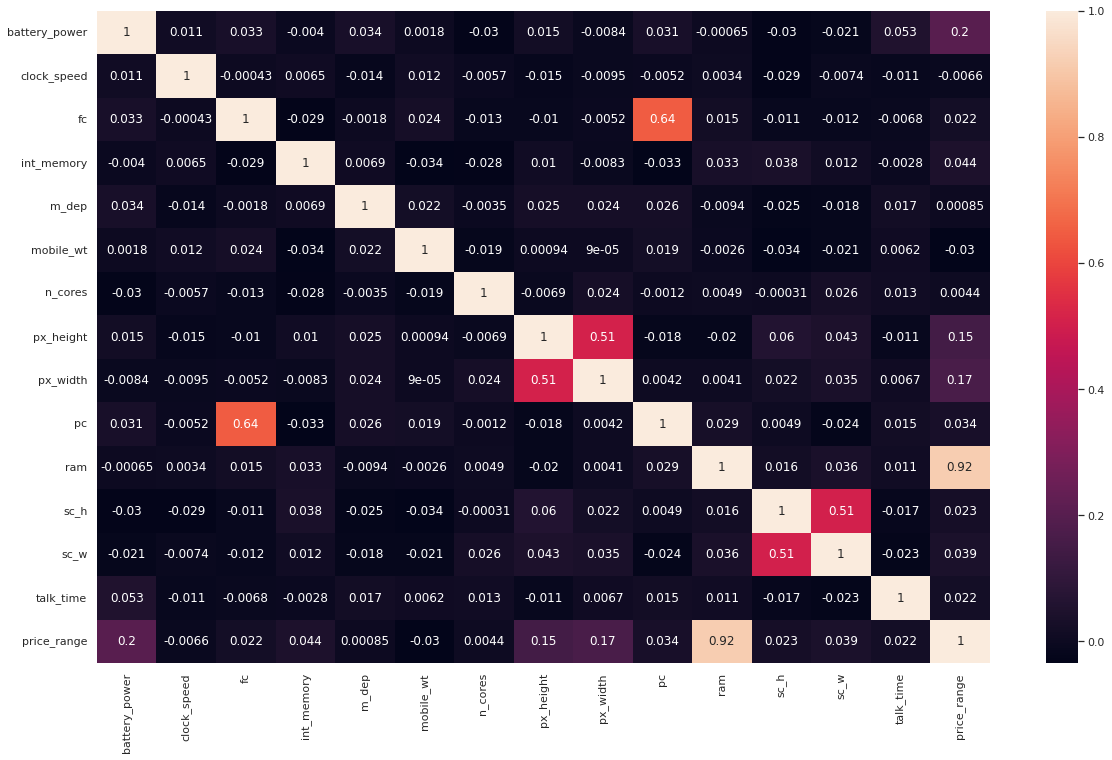

In [49]:
#Verifique o mapa de calor de correlação para variáveis numéricas
data_numeric = df[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores',
                   'px_height','px_width','pc','ram','sc_h','sc_w', 'talk_time','price_range']]
sns.heatmap(data=data_numeric.corr(), annot=True)

fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

Podemos notar as correlações:
- pc e fc = ``0,64``
- px_height e px_width = ``0,51``

Essas duas correlações estão um pouco altas, mas não altas o suficiente para termos que nos preoucpar. Já que <strong>px_height</strong> e <strong>px_width</strong> serem correlacionadas faz sentido, pois essas variáveis dependem do tamanho do telefone e são proporcionalmente relacionadas. O mesmos se aplica as atributos <strong>pc</strong> e <strong>fc</strong>.

### Analisando a correlação entre as variáveis categorico

Podemso

três_g e quatro_g = 0,58
A correlação entre three_g e four_g não é muito chocante, pois cada celular será um ou outro

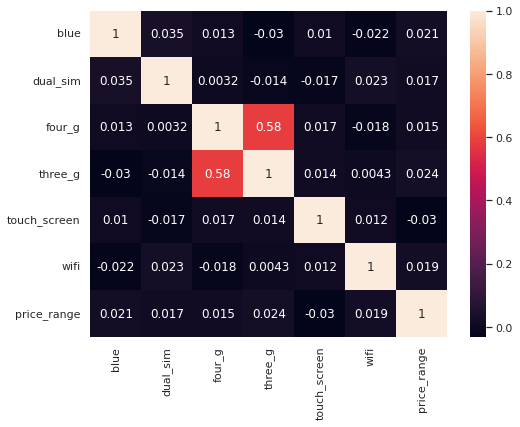

In [50]:
data_categorical = df.drop(['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores',
                   'px_height','px_width','pc','ram','sc_h','sc_w', 'talk_time'],axis=1)

#Check correlation heat map for categorical variables
sns.heatmap(data=data_categorical.corr(), annot=True)

fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

array([[<AxesSubplot:title={'center':'battery_power'}>,
        <AxesSubplot:title={'center':'blue'}>,
        <AxesSubplot:title={'center':'clock_speed'}>,
        <AxesSubplot:title={'center':'dual_sim'}>],
       [<AxesSubplot:title={'center':'fc'}>,
        <AxesSubplot:title={'center':'four_g'}>,
        <AxesSubplot:title={'center':'int_memory'}>,
        <AxesSubplot:title={'center':'m_dep'}>],
       [<AxesSubplot:title={'center':'mobile_wt'}>,
        <AxesSubplot:title={'center':'n_cores'}>,
        <AxesSubplot:title={'center':'pc'}>,
        <AxesSubplot:title={'center':'px_height'}>],
       [<AxesSubplot:title={'center':'px_width'}>,
        <AxesSubplot:title={'center':'ram'}>,
        <AxesSubplot:title={'center':'sc_h'}>,
        <AxesSubplot:title={'center':'sc_w'}>],
       [<AxesSubplot:title={'center':'talk_time'}>,
        <AxesSubplot:title={'center':'three_g'}>,
        <AxesSubplot:title={'center':'touch_screen'}>,
        <AxesSubplot:title={'center':'wifi'}>]

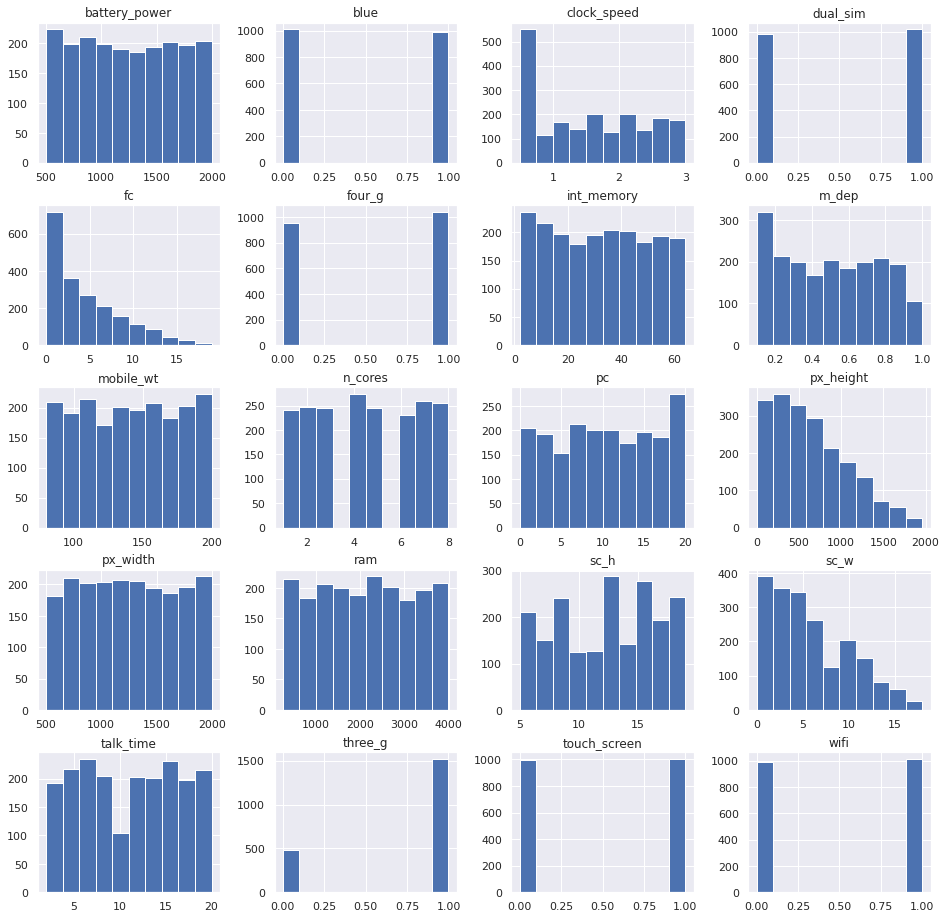

In [38]:
labels = ['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']
# for label in labels:
#   plt.hist(x=df[label], bins=25)
#   plt.ylabel("Quantidade")
#   plt.xlabel(f"Valores possíveis para variável: {label}")
#   plt.show()

data_X.hist(figsize = (16,16))



<AxesSubplot:>

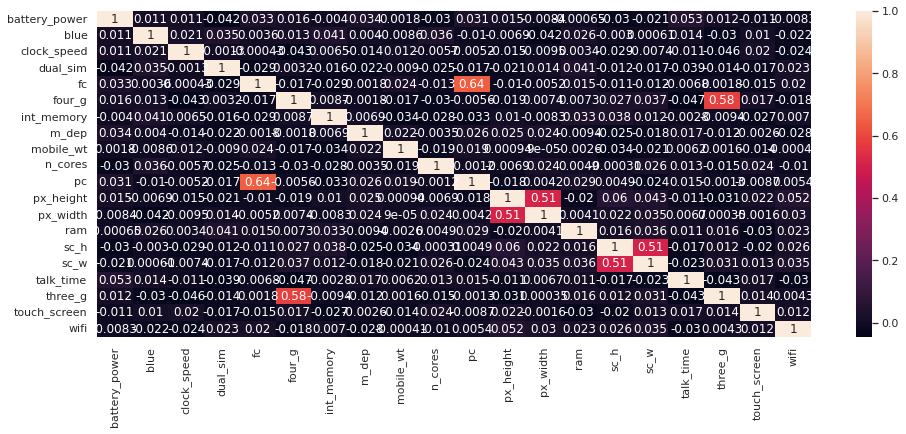

In [39]:
sns.set()
plt.figure(figsize = (16, 6))

sns.heatmap(df[['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']].corr(method="pearson"),annot=True)